<h3>
Name: Jonathan Lawrence<br/>
Date: 8/5/2019<br/>
Term Project: Predicting Goodreads Ratings<br/>
</h3>

<b>Objective</b>: A book's rating on Goodreads can be predicted by looking at specific information about previously rated books.

<b>Dataset</b>: 'book_data.csv'<br/>
<b>Acquired from</b>: https://www.kaggle.com/meetnaren/goodreads-best-books

## SETUP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot

df = pd.read_csv('book_data.csv')

df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


<b>Variables to consider (original)</b>:<br/>
 - book_authors (number of authors)<br/>
 - book_format (book format)<br/>
 - book_pages (number of pages)<br/>
 - book_rating_count (number of ratings)<br/>
 - book_title (book titles)<br/>

## DATA CLEANING

<b>Fixing 'book_authors'</b>

In [2]:
# Drop NAN values
df = df[df['book_pages'].notnull()]

# Remove non-digit text
df['book_pages'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Convert values from float64 to int64
df['book_pages'] = df['book_pages'].astype(np.int64)

Calculate number of authors

In [3]:
# Create a list to store the data
number_of_authors = []

# Count number of author separators '|' (not a slash)
for row in df['book_authors']:
    if row.count("|") == 0:
        authCount = 1
    else:
        authCount = row.count("|") + 1
    
    number_of_authors.append(authCount)

# Create a column from the list
df['number_of_authors'] = number_of_authors

<b>Fixing 'book_format'</b>

Convert values with similar meanings and group arbitrary formats

In [4]:
# Drop NAN values
df = df[df['book_format'].notnull()]

# Create lists for similar meanings
audioBook = ["Audible Audio", "Audio", "Audio Book", "Audio Cassette", "Audio CD", "Audiobook", "CD-ROM", "MP3 CD"]
ebook = ["ebook", "eBook Kindle"]
hardcover = ["Hard Cover", "Hardback", "hardbound", "Hardcover"]
paperback = ["Large Paperback", "Mass Market Paperback", "Paper back", "Paperback", "Trade Paperback"]

# Create a list to store the data
format_simplified = []

# Detect book format. Set arbitrary formats to 'other'
for row in df['book_format']:
    if row in audioBook:
        format_type = "AudioBook"
    elif row in ebook:
        format_type = "Ebook"
    elif row in hardcover:
        format_type = "Hardcover"
    elif row in paperback:
        format_type = "Paperback"
    else:
        format_type = "Other"

    format_simplified.append(format_type)

# Create a column from the list
df['book_format_simplified'] = format_simplified

<b>Fixing 'book_pages'</b>

In [5]:
# Drop NAN and '0' values
df = df[df['book_pages'].notnull()]
df = df[df['book_pages'] != 0]

<b>Fixing 'book_titles'</b>

Count the number of words in the title

In [6]:
# Drop NAN values
df = df[df['book_title'].notnull()]

# Create a list to store the data
title_words = []

# Count the words
for row in df['book_title']:
    if row.count(" ") == 0:
        wordCount = 1
    else:
        wordCount = row.count(" ") + 1

    title_words.append(wordCount)

# Create a column from the list
df['title_words'] = title_words

Reorganize columns so that similar columns are side-by-side

In [7]:
# get a list of columns
cols = list(df)

# Move columns based on index
cols.insert(1, cols.pop(cols.index('number_of_authors')))
cols.insert(5, cols.pop(cols.index('book_format_simplified')))
cols.insert(9, cols.pop(cols.index('book_rating_count')))
cols.insert(12, cols.pop(cols.index('title_words')))

# use ix to reorder
df = df.loc[:, cols]

# Check columns
df.head()

,book_authors,number_of_authors,book_desc,book_edition,book_format,book_format_simplified,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,title_words,genres,image_url
0,Suzanne Collins,1,Winning will make you famous. Losing means cer...,NaN,Hardcover,Hardcover,9.78044E+12,374,4.33,5519135,160706,The Hunger Games,3,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,2,There is a door at the end of a silent corrido...,US Edition,Paperback,Paperback,9.78044E+12,870,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,8,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,1,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,Paperback,9.78006E+12,324,4.27,3745197,79450,To Kill a Mockingbird,4,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,8,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,Paperback,9.78068E+12,279,4.25,2453620,54322,Pride and Prejudice,3,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,1,About three things I was absolutely positive.F...,NaN,Paperback,Paperback,9.78032E+12,498,3.58,4281268,97991,Twilight,1,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


<b>Variables to consider (updated)</b>:<br/>
 - number_of_authors (number of authors)<br/>
 - book_format_simplified (book format)<br/>
 - book_pages (number of pages)<br/>
 - book_rating_count (number of ratings)<br/>
 - title_words (book titles)<br/>

## HISTOGRAMS

### Variable 1: number_of_authors

(0, 10)

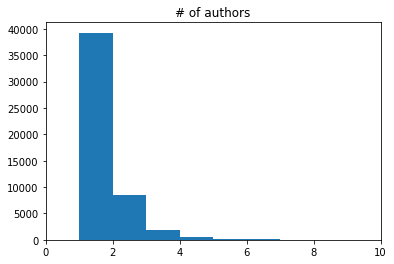

In [8]:
plt.hist(df.number_of_authors, bins=50)
plt.title("# of authors")
plt.xlim([0,10])

As expected, most books have only one author. There are a few outliers at 6+ authors, but we can assume they are collections of short stories or smaller, published works sold together as a set.

### Variable 2: book_format_simplified

Text(0.5,1,'Book Format')

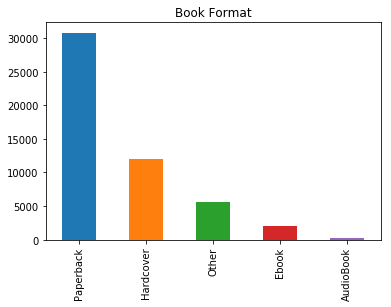

In [9]:
df['book_format_simplified'].value_counts().plot(kind='bar')
plt.title("Book Format")

Most books with reviews are paperbacks. This could be due to publishing costs of hardcovers and/or technology required to access digital media. The outliers in this case would be the 'Other' category. It likely contains some books that would more closely match one of our primary formats, but the person who added these books in the data wrote a vauge description of the format.

### Variable 3: book_pages

(0, 1800)

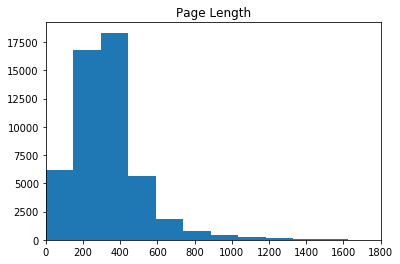

In [10]:
plt.hist(df.book_pages, bins=100)
plt.title("Page Length")
plt.xlim([0,1800])

A majority of books represented contain anywhere from 200-400 pages. There are some outliers with over 1000, but they are very infrequent.

### Variable 4: book_rating_count

(0, 400000)

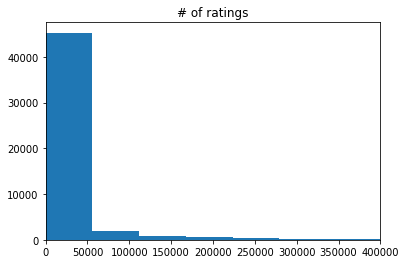

In [11]:
plt.hist(df.book_rating_count, bins=100)
plt.title("# of ratings")
plt.xlim([0,400000])

Most of the books have 0-50,000 ratings. Very few have more than 50,000 so we can consider those as outliers.

### Variable 5: title_words

Text(0.5,1,'# of words in title')

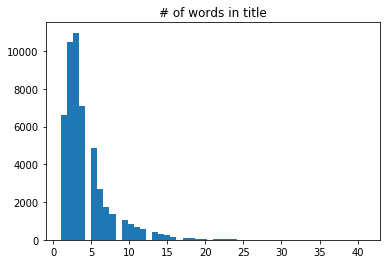

In [12]:
plt.hist(df.title_words, bins=50)
plt.title("# of words in title")

Most books have anywhere from 2-5 words. Very few book titles contain more than 10 words, so we can assume those outliers are potentially parts of collections or short stories.

## MEAN, MODE, SPREAD & TAILS

<b>Mean</b>: The central tendency of the distribution<br/>
<b>Mode</b>: The value that occurs most often.<br/>
<b>Spread</b>: How much variability is there in the values?<br/>
<b>Tails</b>: How quickly do the probabilities drop off as we move away from the modes?

In [13]:
# Mean
MEAN_number_of_authors = df["number_of_authors"].mean()
#MEAN_book_format_simplified = df["book_format_simplified"].mean()
MEAN_book_pages = df["book_pages"].mean()
MEAN_book_book_rating_count = df["book_rating_count"].mean()
MEAN_title_words = df["title_words"].mean()

# Mode
MODE_number_of_authors = df["number_of_authors"].mode()
#MODE_book_format_simplified = df["book_format_simplified"].mode()
MODE_book_pages = df["book_pages"].mode()
MODE_book_book_rating_count = df["book_rating_count"].mode()
MODE_title_words = df["title_words"].mode()

# Spread (variance)
VAR_number_of_authors = df["number_of_authors"].var()
#VAR_book_format_simplified = df["book_format_simplified"].var()
VAR_book_pages = df["book_pages"].var()
VAR_book_book_rating_count = df["book_rating_count"].var()
VAR_title_words = df["title_words"].var()

# Summarized view: Below we can see the mean and mode (labeled 'top') for each
# of these variables.
df.describe(include='all')

,book_authors,number_of_authors,book_desc,book_edition,book_format,book_format_simplified,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,title_words,genres,image_url
count,50595,50595.000000,49746,5215,50595,50595,39982,50595.000000,50595.000000,5.059500e+04,50595.000000,50595,50595.000000,48090,50297
unique,25589,NaN,48726,2067,137,5,525,NaN,NaN,NaN,NaN,45174,NaN,28696,50297
top,Stephen King,NaN,This book was converted from its physical edit...,First Edition,Paperback,Paperback,9.78006E+12,NaN,NaN,NaN,NaN,1984,NaN,Fiction,https://images.gr-assets.com/books/1402067293l...
freq,110,NaN,16,431,28129,30807,2395,NaN,NaN,NaN,NaN,16,NaN,199,1
mean,NaN,1.353790,NaN,NaN,NaN,NaN,NaN,339.745825,4.014564,4.562482e+04,2115.233205,NaN,4.171302,NaN,NaN
std,NaN,1.364632,NaN,NaN,NaN,NaN,NaN,258.181953,0.341158,2.179478e+05,7819.156309,NaN,3.324114,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000e+00,0.000000,NaN,1.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,220.000000,3.820000,5.200000e+02,43.000000,NaN,2.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,311.000000,4.020000,3.208000e+03,214.000000,NaN,3.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,401.000000,4.210000,1.403250e+04,897.000000,NaN,5.000000,NaN,NaN


## PMF (Probability Mass Function)<br/>
I'm going to plot the ratings that the books received.

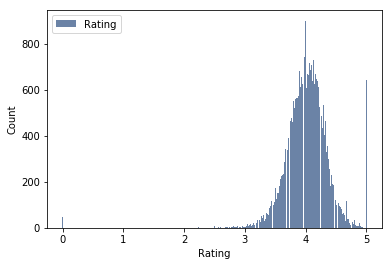

In [14]:
hist_rating = thinkstats2.Hist(df.book_rating, label='Rating')

thinkplot.Hist(hist_rating)
thinkplot.Config(xlabel='Rating', ylabel='Count')
plt.legend(loc='upper left')

<b>Fixing 'book_rating'</b><br/>

Viewing the PMF for this data would generate a very large list. To simplyify things, I will reduce the amount of plot ticks. This may slightly throw off the PMF number, but I anticipate it will be by a very small factor that is still approximately equal to '1'. Two decimal places is a bit too specific for this project, and since most ratings are entered in either half or whole number increments, I'll round to the nearest half number.

In [15]:
df['book_rating_rounded']= round(df['book_rating']*2)/2

Replotting the histogram after rounding

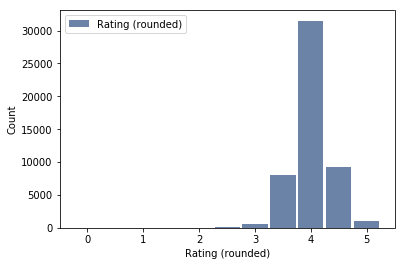

In [16]:
hist_rounded = thinkstats2.Hist(df.book_rating_rounded, label='Rating (rounded)')

thinkplot.Hist(hist_rounded)
thinkplot.Config(xlabel='Rating (rounded)', ylabel='Count')
plt.legend(loc='upper left')

Get the PMF by normalizing the distribution, by dividing through the total count.

In [17]:
pmf = thinkstats2.Pmf(hist_rounded)
pmf

Pmf({4.0: 0.6227888131238264, 4.5: 0.18379286490759955, 3.5: 0.15995651744243503, 5.0: 0.01913232532858978, 3.0: 0.012273940112659353, 2.5: 0.0009684751457653918, 0.0: 0.0008894159501927067, 2.0: 0.00013835359225219883, 1.5: 3.952959778634252e-05, 1.0: 1.976479889317126e-05}, 'Rating (rounded)')

In [18]:
# Sum of probabilities
pmf.Total()

0.9999999999999998

As expected, rounding slightly changed our total PMF, but the difference is so small that the number is approximately '1'.

For easier viewing, I've decided to split up the ratings by high and low. Since the rating scale is 0-5, we will consider 4.0 to be the divider between what is considered high and low ratings.

In [19]:
# high rating
df_highRating = df.book_rating[df['book_rating'] >= 4.0]
# low rating
df_lowRating = df.book_rating[df['book_rating'] < 4.0]

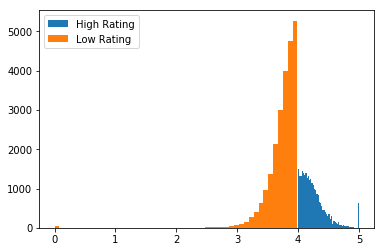

In [20]:
# Using Pyplot's "hist" to plot a histogram of a sequence of values
plt.hist(df_highRating, bins=50, label="High Rating")
plt.hist(df_lowRating, bins=50, label="Low Rating")
plt.legend(loc='upper left')
plt.show()

Based on this figure, there are more books rated less than 4.0 than there are rated higher than 4.0.

In [21]:
# Using the thinkstats2 module
thinkstats2.Pmf(df_highRating)

Pmf({4.0: 0.0330669403915243, 4.13: 0.026871471515507003, 4.07: 0.026688173619766845, 4.06: 0.02624825866999047, 4.1: 0.025918322457658186, 4.09: 0.025588386245325903, 4.08: 0.02525845003299362, 4.03: 0.024561918029181024, 4.16: 0.024525258450032995, 4.05: 0.0244152797125889, 4.12: 0.02419532223770071, 4.17: 0.023975364762812524, 4.14: 0.02393870518366449, 4.04: 0.0238287264462204, 4.18: 0.023718747708776303, 4.02: 0.02364542855048024, 5.0: 0.023608768971332208, 4.2: 0.023462130654740083, 4.11: 0.02338881149644402, 4.15: 0.022985556125815675, 4.21: 0.022508981596891266, 4.22: 0.022399002859447174, 4.01: 0.02228902412200308, 4.19: 0.020859300535229854, 4.25: 0.02041938558545348, 4.29: 0.019576215265048758, 4.24: 0.019539555685900725, 4.23: 0.019319598211012538, 4.27: 0.018036512940831438, 4.26: 0.017926534203387346, 4.33: 0.017083363882982622, 4.3: 0.016936725566390497, 4.28: 0.01587359777109759, 4.31: 0.01484712955495271, 4.32: 0.01352738470562358, 4.36: 0.013014150597551141, 4.34: 0.0

## CDF (Cumulative Distribution Function)<br/>
I am using the <b>book_pages</b> variable to determine if there is a community-favorite 'sweet spot' for page length that might generate better ratings.

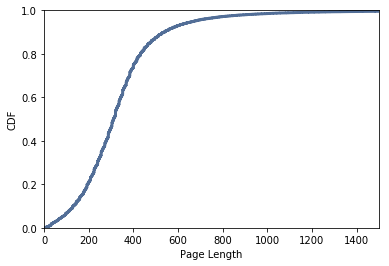

<Figure size 576x432 with 0 Axes>

In [22]:
cdf = thinkstats2.Cdf(df.book_pages)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Page Length', ylabel='CDF', axis=[0, 1500, 0, 1])

It appears that approximately 90% of books have 600 pages or less. The graph is mostly smooth from page length 0-600, indicating that there is not a prefered page length in that range. Less than 5% of books are over 800 pages, and likewise less than 5% are under 100 pages.

## ANALYTICAL DISTRIBUTION<br/>
I'd like to plot the normal distribution for the book ratings.

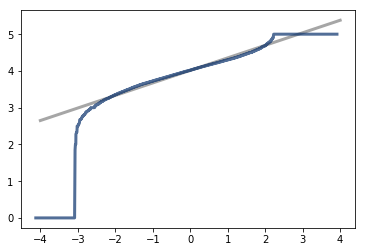

In [23]:
def MakeNormalPlot(book_ratings):
    mean = df["book_rating"].mean()
    std =  df["book_rating"].std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    
    xs,ys = thinkstats2.NormalProbability(df.book_rating)
    thinkplot.Plot(xs,ys, label='Model')
    
MakeNormalPlot(df.book_rating)

My model (gray) and the data (blue) are very similar, but there is a slight difference at the extremes. Really low ratings are lower than the model predicted, and really high ratings are slightly higher than it predicted.

## SCATTERPLOTS<br/>
I want to compare two variables to the overall rating, page length (<b>book_pages</b>) and the number of ratings (<b>book_rating_count</b>). For page length, I'm removing books with 0 pages. 

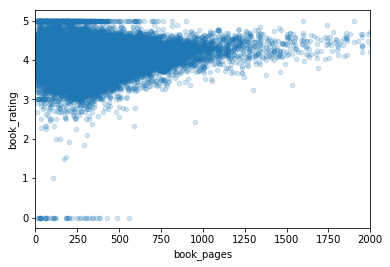

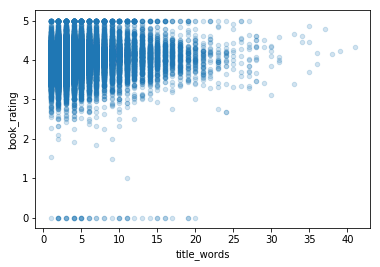

In [24]:
axis = plt.gca()
axis.set_xlim([0,2000])
scatterPages = df.plot.scatter(x='book_pages', y='book_rating', ax=axis, alpha=0.2)
scatterRatingCount = df.plot.scatter(x='title_words', y='book_rating', alpha=0.2)

From the first graph, it appears that a book's rating has a <b>weak positive</b> correlation with the page length. From the second graph, it seems that a book's rating has a <b>weak positive</b> correlation with the number of words in the title. From this, we can say that a book's rating is slightly affected by the page length and the number of words in the title.

## HYPOTHESIS TEST<br/>

I want to determine whether the effects I've seen in the sample are likely to appear in the larger population.

Test statistic: Difference in means (of page length) between books with a high rating (4.0 or higher) and a low rating (less than 4.0).

In [25]:
# high rating
df_highRating = df[df['book_rating'] >= 4.0]
# low rating
df_lowRating = df[df['book_rating'] < 4.0]

# high rating
df_highRating_means = df_highRating.book_rating[df['book_pages'] >= 750].mean()
# low rating
df_lowRating_means = df_lowRating.book_rating[df['book_pages'] < 750].mean()

print("Mean Rating (750+ pages): {}".format(df_highRating_means))
print("Mean Rating (less than 750 pages): {}".format(df_lowRating_means))

Mean Rating (750+ pages): 4.318529607451765
Mean Rating (less than 750 pages): 3.7466573973495962


To check whether an observed correlation is statistically significant, we can run a permutation test with a different test statistic.

In [26]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return(test_stat)

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return(xs, ys)

In [27]:
# Correlation between highly rated books, and lower rated books
data = df.book_pages.values, df.book_rating.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The reported p-value is 0, which means that we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. We can see how unexpected the observed value is under the null hypothesis by comparing the actual correlation to the largest value we saw in the simulation.

In [28]:
ht.actual, ht.MaxTestStat()

(0.12425034401665135, 0.017890205022071906)

## REGRESSION ANALYSIS<br/>

I want to describe the relationship between a dependent variable (book_rating) and several independent variables (book_pages, title_words, book_rating_count).
Test statistic: Difference in means (of page length) between books with a high rating (4.0 or higher) and a low rating (less than 4.0).

In [29]:
import statsmodels.formula.api as smf

formula = 'book_rating ~ book_pages + title_words + book_rating_count'
results = smf.ols(formula, data = df).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            book_rating   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     498.2
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          4.43e-319
Time:                        15:04:02   Log-Likelihood:                -16644.
No. Observations:               50595   AIC:                         3.330e+04
Df Residuals:                   50591   BIC:                         3.333e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.9098      0.003   1249.994      0.000       3.904       3.916
book_pages            0.0002    5.8e-06     28.067      0.000       0.000       0.000
title_words           0.0111      0.000     24.651      0.000       0.010       0.012
book_rating_count  7.078e-08   6.87e-09     10.298      0.000    5.73e-08    8.43e-08
==============================================================================
Omnibus:                    23231.120   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           788228.382
Skew:                          -1.572   Prob(JB):                         0.00
Kurtosis:                      22.079   Cond. No.                     4.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
slope1 = results.params['book_pages']
slope2 = results.params['title_words']
slope3 = results.params['book_rating_count']
print(slope1)
print(slope2)
print(slope3)

0.00016266631215288178
0.011099350093493086
7.078485656505614e-08


In [31]:
# Difference in ratings
diff_rating = df_highRating.book_rating.mean()- df_lowRating.book_rating.mean()
diff_rating

0.495101747178452

From these numbers, we can conclude that the difference in ratings can be partly explained by the difference in the page length, number of words in the title, and the number of ratings a book receives. The largest factor of the three is the number of words in the title.